<a href="https://colab.research.google.com/github/hamartinezma/Best-README-Template/blob/master/GFPGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GFPGAN Inference Demo 
### (No colorization; No CUDA extensions required)

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

If you want to use the paper model, please go to this [Colab Demo](https://colab.research.google.com/drive/1Oa1WwKB4M4l1GmR7CtswDVgOCOeSLChA?usp=sharing) for GFPGAN <a href="https://colab.research.google.com/drive/1Oa1WwKB4M4l1GmR7CtswDVgOCOeSLChA?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.

**Limitations**: GFPGAN could not handle all the low-quality faces in the real world. Therefore, it may fail on your own cases.

###Enjoy! :-)

<img src="https://xinntao.github.io/projects/GFPGAN_src/gfpgan_teaser.jpg" width="800">


# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [1]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 378 (delta 118), reused 93 (delta 93), pack-reused 231
Receiving objects: 100% (378/378), 5.28 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (200/200), done.
/content/GFPGAN
     |████████████████████████████████| 161 kB 5.4 MB/s 
     |████████████████████████████████| 5.8 MB 50.1 MB/s 
     |████████████████████████████████| 190 kB 53.1 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194439 sha256=4a10498d5e885cbd3d032417f40c650a772f8c5dfb7fc48c0ec76a9d7cff73a0
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 177 kB 10.4 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-

# 2. Upload Images / Use the demo images

In [9]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving basemejorado.jpg to basemejorado.jpg
move basemejorado.jpg to inputs/upload/basemejorado.jpg


### OR you can use the demo image by running the following codes

In [ ]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.move('inputs/whole_imgs/Blake_Lively.jpg', 'inputs/upload/Blake_Lively.jpg')

## 3. Inference

In [10]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
!rm -rf results
!python inference_gfpgan.py --upscale 2 --test_path inputs/upload --save_root results --model_path experiments/pretrained_models/GFPGANCleanv1-NoCE-C2.pth --bg_upsampler realesrgan

!ls results/cmp

Processing basemejorado.jpg ...
	Tile 1/192
	Tile 2/192
	Tile 3/192
	Tile 4/192
	Tile 5/192
	Tile 6/192
	Tile 7/192
	Tile 8/192
	Tile 9/192
	Tile 10/192
	Tile 11/192
	Tile 12/192
	Tile 13/192
	Tile 14/192
	Tile 15/192
	Tile 16/192
	Tile 17/192
	Tile 18/192
	Tile 19/192
	Tile 20/192
	Tile 21/192
	Tile 22/192
	Tile 23/192
	Tile 24/192
	Tile 25/192
	Tile 26/192
	Tile 27/192
	Tile 28/192
	Tile 29/192
	Tile 30/192
	Tile 31/192
	Tile 32/192
	Tile 33/192
	Tile 34/192
	Tile 35/192
	Tile 36/192
	Tile 37/192
	Tile 38/192
	Tile 39/192
	Tile 40/192
	Tile 41/192
	Tile 42/192
	Tile 43/192
	Tile 44/192
	Tile 45/192
	Tile 46/192
	Tile 47/192
	Tile 48/192
	Tile 49/192
	Tile 50/192
	Tile 51/192
	Tile 52/192
	Tile 53/192
	Tile 54/192
	Tile 55/192
	Tile 56/192
	Tile 57/192
	Tile 58/192
	Tile 59/192
	Tile 60/192
	Tile 61/192
	Tile 62/192
	Tile 63/192
	Tile 64/192
	Tile 65/192
	Tile 66/192
	Tile 67/192
	Tile 68/192
	Tile 69/192
	Tile 70/192
	Tile 71/192
	Tile 72/192
	Tile 73/192
	Tile 74/192
	Tile 75/192
	T

## 4. Visualize

In [11]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


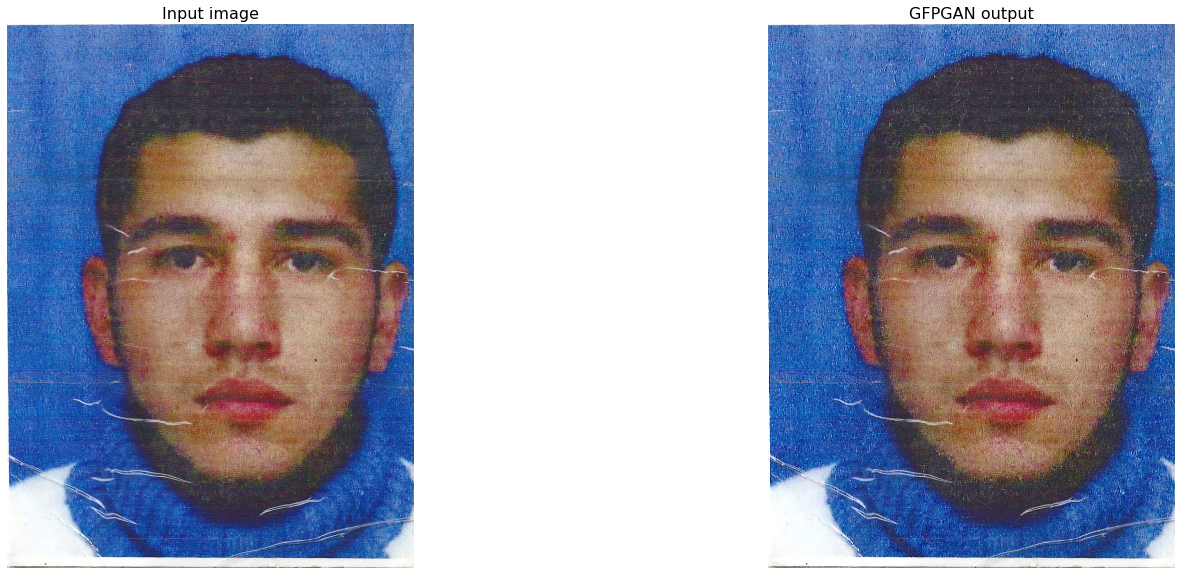

In [12]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 5. Download results

In [13]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>